<a href="https://colab.research.google.com/github/jose-marquez89/crime-in-sa/blob/master/sa_crime_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Crime In San Antonio**

Below is the code used in exploring and visualizing data in the blog post, ['Crime in San Antonio: How Safe Is The Alamo City?'](https://joseluismarquezjr.wordpress.com/portfolio/crime-in-sa/). It is a data visualization project for my professional portfolio. Here, data scraped from the city of San Antonio's uniform crime report is funneled into a usable form, and then visualized through matplotlib and seaborn plotting libraries.

>Because this file was created in Colab, a bit of font housekeeping is in order. The shell commands below import a Georgia style font into a directory where .ttf font files are stored. These are used for the text in the plots.

In [0]:
mkdir /usr/share/fonts/truetype/pennywise

In [0]:
cd /usr/share/fonts/truetype/pennywise

In [0]:
!wget https://github.com/jose-marquez89/cats/raw/master/catPics/hiyaGeorgie.ttf

In [0]:
!wget https://github.com/jose-marquez89/cats/raw/master/catPics/heavyGeorgie.ttf

In [0]:
!wget https://github.com/jose-marquez89/cats/raw/master/catPics/slantyGeorgie.ttf

In [0]:
!wget https://github.com/jose-marquez89/cats/raw/master/catPics/heavySlantyGeorgie.ttf

In [0]:
cd /content

In [0]:
!fc cache -fv

In [0]:
rm -fr ~/.cache/matplotlib

>At this point, it's a good idea to restart runtime so matplotlib's cache can be properly updated and the font files can be accessed. After this, all cells should run without a hitch. 

# A Content Disclaimer

A version of this message is included in the [blog post:](https://joseluismarquezjr.wordpress.com/portfolio/crime-in-sa/)

***Before moving on to take a look at the code below***, it should be noted that the data used in this project deals with violent crime, including that of a sexual nature. Although rape, aggravated assault, homicide and violent robbery are not the focus of this project, I have made conscious efforts to treat these subjects with as much care and objectivity as any thoughtful journalist would. 

As data scientists, we often face investigation of data that reveals the true nature of life. The subject material we encounter will not always be positive or pleasant, but we would be remiss to exclude these matters from our investigations. Rather than shy away from these, it feels far more productive and impactful to bring awareness to painful human matters with respect, so as to promote helpful dialogue that could lead to meaningful changes in the status quo.

That said, I have borrowed the following 8 writing points* from an [article](https://www.youthkiawaaz.com/2017/12/how-to-write-about-sexual-violence/) written by [Shambavi Saxena](https://www.youthkiawaaz.com/author/shambhavi_saxena_1/):



1.   People who have endured these experiences are survivors, not victims
2.   Use active voice wherever possible to avoid tacitly suggesting that survivors have contributed to the crime
3.   Writing should not suggest that a survivor was inviting trouble
4.   Protect (wherever it may apply) survivor identities
5.   Avoid applying heirarchy to different forms of sexual violence
6.   If attempting to present an unbiased view of an incident, quote multiple sources tactfully; character assassination reinforces victim shaming
7.   Be aware of the gender spectrum
8.   If you must address sexual violence targeted towards men, there is no need for the word, "too"

**Not all of these points apply to the material or the blog post, but I've included them here as reference and to understand the decisions made regarding choice of language.*








In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get the data from the SAPD website (python code in github project repo)
data_url = 'https://raw.githubusercontent.com/' \
           'jose-marquez89/crime-in-sa/master/crime_in_sa.csv'

# Column header names from the tables on the website
names = ['date', 'homicide', 'rape', 
         'robbery', 'aggr-assault', 
         'total-violent', 'burglary', 
         'larceny-theft', 'vehicle-theft', 
         'total-property', 'total-ucr-pt1', 
         'simple-assaults']

df = pd.read_csv(data_url, names=names)
df.head(10)

,date,homicide,rape,robbery,aggr-assault,total-violent,burglary,larceny-theft,vehicle-theft,total-property,total-ucr-pt1,simple-assaults
0,Jan 2019,10,115,171,476,772,737,"4,162",633,"5,532","6,304","1,620"
1,Feb 2019,9,94,140,449,692,587,"3,548",552,"4,687","5,379","1,554"
2,Mar 2019,7,113,147,554,821,655,"4,092",568,"5,315","6,136","1,907"
3,Apr 2019,13,133,139,590,875,706,"4,121",545,"5,372","6,247","2,012"
4,May 2019,6,145,168,730,"1,049",738,"4,522",586,"5,846","6,895","2,039"
5,Jun 2019,8,117,161,676,962,719,"4,305",608,"5,632","6,594","1,900"
6,Jul 2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,
7,Aug 2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,
8,Sep 2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,
9,Oct 2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,


## Cleaning and Exploring Data
Since the data was scraped from a website, there's a good chance it will need a fair amount of cleaning. 

In [2]:
from pprint import pprint

# Number of rows and columns
print('Shape: ', df.shape)

# Look for null values
print('Total null values:\n')
pprint(df.isnull().sum())

Shape:  (108, 12)
Total null values:

date               0
homicide           6
rape               6
robbery            6
aggr-assault       6
total-violent      6
burglary           6
larceny-theft      6
vehicle-theft      6
total-property     6
total-ucr-pt1      0
simple-assaults    0
dtype: int64


There are 6 null values in each of the offense columns, these are the months of 2019 that had not yet been documented by the police department. Since they are along the row axis and full of null values, I'm opting to drop them.

In [3]:
# Drop rows with null values, since I've already accounted for them
df = df.dropna()

# Null values are cleared
df.isnull().sum()

date               0
homicide           0
rape               0
robbery            0
aggr-assault       0
total-violent      0
burglary           0
larceny-theft      0
vehicle-theft      0
total-property     0
total-ucr-pt1      0
simple-assaults    0
dtype: int64

I know that most of my data will need to be numeric, however, because it was scraped from a website, this inevitably produced string or object values. I'll need to convert them to a usable numeric form before I can work with the data set.

In [0]:
print(df.dtypes)

date               object
homicide           object
rape               object
robbery            object
aggr-assault       object
total-violent      object
burglary           object
larceny-theft      object
vehicle-theft      object
total-property     object
total-ucr-pt1      object
simple-assaults    object
dtype: object


In [0]:
# Strip columns that appear numeric and replace columns
df = df.apply(lambda x: x.str.strip())
df = df.apply(lambda x: x.str.strip('\u200b'))
df = df.apply(lambda x: x.str.strip('/'))
df = df.apply(lambda x: x.str.strip('\n'))
df = df.apply(lambda x: x.str.replace(',', ''))
df = df.apply(lambda x: x.str.replace('.', ''))


In [5]:
# Convert every column except 'date' to numeric
numeric_cols = ['homicide', 'rape', 'robbery', 'aggr-assault', 'total-violent', 
         'burglary', 'larceny-theft', 'vehicle-theft', 'total-property', 
         'total-ucr-pt1', 'simple-assaults']

for col in numeric_cols:
  df[col] = pd.to_numeric(df[col])

df.dtypes

date               object
homicide            int64
rape                int64
robbery             int64
aggr-assault        int64
total-violent       int64
burglary            int64
larceny-theft       int64
vehicle-theft       int64
total-property      int64
total-ucr-pt1       int64
simple-assaults     int64
dtype: object

In [0]:
# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])

# Sort entire dataframe by date
df = df.sort_values(by='date') 

# Reset the index to match the ordered dates
df = df.reset_index()

## Visualizations
Below are the 4 visualizations used in the San Antonio Crime blog post. The first one is a line plot showing the change over time in crime from 2011-2019.
### Line Plot
Since I'm working with datetime, I'll need to do some date conversions to smoothly integrate this metric into the visualizations

In [0]:
# Date converters need to be registered 
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

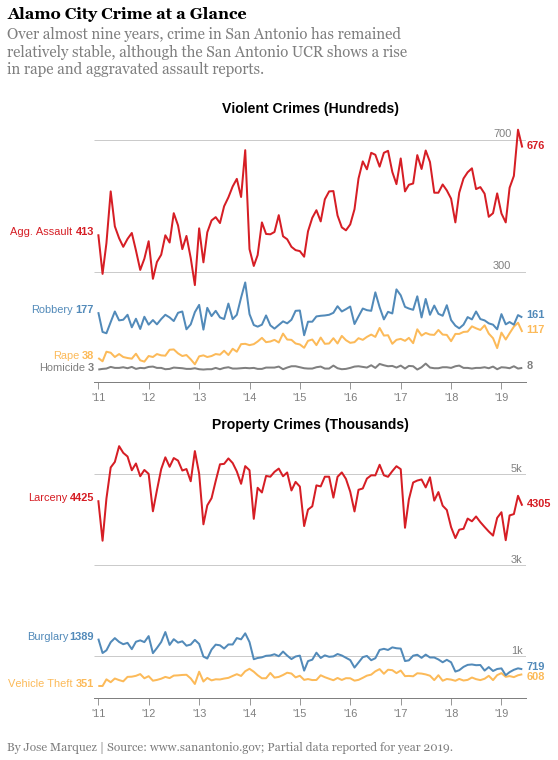

In [9]:
# Visualize property and violent crimes in one figure

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 9))

plt.style.use("fivethirtyeight")

# Main title
fig.suptitle("Alamo City Crime at a Glance", ha="left",
            fontweight='bold', fontsize=16, x=0.03, y=1.1225, 
             fontname="Georgia")

# Subtitle
subtitle = "Over almost nine years, crime in "\
           "San Antonio has remained \nrelatively " \
           "stable, although the San Antonio UCR shows a rise \nin " \
           "rape and aggravated assault reports." 

fig.text(s=subtitle, x=0.03, y=1.019, ha="left", 
         fontsize=15, fontname="Georgia", alpha=0.5)

# Set facecolor to white 
fig.patch.set(facecolor=(0, 0, 0, 0)) # The image will be saved with a
ax1.set(facecolor=(0, 0, 0, 0))       # transparant background but i'm
ax2.set(facecolor=(0, 0, 0, 0))       # using white to better work with colors

# Violent crimes ax
ax1.plot(df['date'], df['homicide'], lw=2, color='gray')
ax1.plot(df['date'], df['rape'], lw=2, color='#FCBA59')
ax1.plot(df['date'], df['robbery'], lw=2, color='#528AB9')
ax1.plot(df['date'], df['aggr-assault'], lw=2, color='#D61E25')

# Property crimes ax
ax2.plot(df['date'], df['vehicle-theft'], lw=2, color='#FCBA59')
ax2.plot(df['date'], df['burglary'], lw=2, color='#528AB9')
ax2.plot(df['date'], df['larceny-theft'], lw=2, color='#D61E25')

# Remove vertical grid lines
ax1.grid(b=False, axis='x')
ax2.grid(b=False, axis='x')

# Shorten grid width
ax1.set_xlim('2010-12-01', '2019-07-01')
ax2.set_xlim('2010-12-01', '2019-07-01')

# Lengthen x ticks
ax1.tick_params(axis='x', length=7, color='gray')
ax2.tick_params(axis='x', length=7, color='gray')


# Remove spines, set x tick labels
spines_list = ['top', 'left', 'right']
for axe in fig.axes:
  for sp in spines_list:
    axe.spines[sp].set_visible(False)
  axe.spines['bottom'].set_color('gray')
  axe.spines['bottom'].set_linewidth(1)
  axe.set_xticklabels(["'10","'11", "'12", "'13", "'14", 
                       "'15", "'16", "'17", "'18", "'19"],
                      fontname="Liberation Sans", fontsize=11, alpha=0.5)

# Set y tick labels
ax1.set_yticks(range(300, 800, 400))
ax1.set_yticklabels(labels=[],       # I've left the labels blank intentionally 
                    fontname="Liberation Sans", fontsize=11, alpha=0.5)
ax2.set_yticks(range(1000, 6000, 2000))
ax2.set_yticklabels(labels=[],
                    fontname="Liberation Sans", fontsize=11, alpha=0.5)

# Set small title above each axe to differentiate them
ax1.set_title("Violent Crimes (Hundreds)", fontname="Liberation Sans", 
              fontweight="bold", fontsize=14)
ax2.set_title("Property Crimes (Thousands)", fontname="Liberation Sans", 
              fontweight="bold", fontsize=14)




# Add annotations

# Dictionary for axe label loop (excludes vehicle theft, required manual adj)
features_colors = {'homicide':(ax1, 'gray'), 
                   'rape':(ax1, '#FCBA59'),
                   'robbery': (ax1, '#528AB9'),
                   'aggr-assault': (ax1, '#D61E25'), 
                   'burglary':(ax2, '#528AB9'), 
                   'larceny-theft':(ax2, '#D61E25')}

# Create axe line number and colors
for feature, attr in features_colors.items():
  axe = attr[0]
  color = attr[1]
  start = df[feature].iloc[0]
  end = df[feature].iloc[-1]
  axe.text(s=start, x='2010-12-01', y=start, ha="right", fontweight="bold", 
           fontsize=11, color=color, fontname="Liberation Sans")
  axe.text(s=end, x='2019-07-01', y=end, fontweight="bold", fontsize=11, 
           color=color, fontname="Liberation Sans")

# Names for each line
ax1.text(s="Homicide", x='2010-10-01', y=df['homicide'].iloc[0], 
         ha="right", fontsize=11, color='gray', fontname="Liberation Sans")
ax1.text(s="Rape", x='2010-08-20', y=df['rape'].iloc[0], 
         ha="right", fontsize=11, color='#FCBA59', fontname="Liberation Sans")
ax1.text(s="Robbery", x='2010-07-01', y=df['robbery'].iloc[0], 
         ha="right", fontsize=11, color='#528AB9', fontname="Liberation Sans")
ax1.text(s="Agg. Assault", x='2010-06-25', y=df['aggr-assault'].iloc[0], 
         ha="right", fontsize=11, color='#D61E25', fontname="Liberation Sans")

ax2.text(s="Burglary", x='2010-06-01', y=df['burglary'].iloc[0], 
         ha="right", fontsize=11, color='#528AB9', fontname="Liberation Sans")
ax2.text(s="Larceny", x='2010-05-20', y=df['larceny-theft'].iloc[0], 
         ha="right", fontsize=11, color='#D61E25', fontname="Liberation Sans")
ax2.text(s="Vehicle Theft", x='2010-07-01', y=df['vehicle-theft'].iloc[0], 
         ha="right", fontsize=11, color='#FCBA59', fontname="Liberation Sans")

# Manually adjust vehicle theft line numbers
ax2.text(s=df['vehicle-theft'].iloc[0], x='2010-12-01', 
         y=df['vehicle-theft'].iloc[0], ha="right", fontweight="bold", 
         fontsize=11, color='#FCBA59', fontname="Liberation Sans")
ax2.text(s=df['vehicle-theft'].iloc[-1], 
         x='2019-07-01', y=500, 
         fontweight="bold", fontsize=11, 
         color='#FCBA59', fontname="Liberation Sans")

# Manually create custom grid numbers
ax1.annotate('700', ('2018-11-01', 710), 
             fontname="Liberation Sans", 
             fontsize=11, alpha=0.5)
ax1.annotate('300', ('2018-11-01', 310), 
             fontname="Liberation Sans", 
             fontsize=11, alpha=0.5)
ax2.annotate('1k', ('2019-06-01', 1075), 
             fontname="Liberation Sans",  
             ha='right', fontsize=11, alpha=0.5)
ax2.annotate('3k', ('2019-06-01', 3075), 
             fontname="Liberation Sans",  
             ha='right', fontsize=11, alpha=0.5)
ax2.annotate('5k', ('2019-06-01', 5075), 
             fontname="Liberation Sans",  
             ha='right', fontsize=11, alpha=0.5)

# Add footer
fig.text(s="By Jose Marquez | Source: www.sanantonio.gov; " \
         "Partial data reported for year 2019.", 
         x=0.03, y=-.025, ha="left", fontsize=12, 
         fontname="Georgia", alpha=0.5)

# Apply tight layout and save with transparent bg
plt.tight_layout()
plt.savefig('atGlance.png', bbox_inches='tight', transparent=True, dpi=90)

plt.show()

### Scatter Plot
This scatter plot provides a closer look at the upward trends in rape and aggravated assault reports. Although I didn't necessarily need to use linear regression to show the trend, I wanted the visualization to be immediately apparent, and it may not have been for aggravated assault had I stuck solely with markers

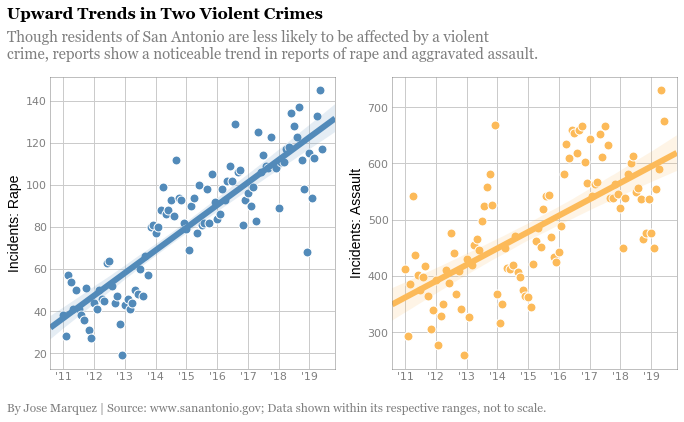

In [0]:
import matplotlib.dates as mdates
import seaborn as sns

# Scatter plot of aggravated assault with line of best fit
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

fig.patch.set(facecolor='white')

# Format dates to numerical form for calculations
formatted_dates = mdates.date2num(df['date'])

# Plot points on regression plot
sns.regplot(formatted_dates, df['rape'], color='#528AB9', ax=axes[0], 
            scatter_kws={'edgecolor': 'white', 's':80, 'alpha':1})
sns.regplot(formatted_dates, df['aggr-assault'], color='#FCBA59',ax=axes[1], 
            scatter_kws={'edgecolor':'white', 's':80, 'alpha':1})
# Title
fig.suptitle('Upward Trends in Two Violent Crimes', 
             x=0.02, y=1.075, ha="left", fontweight='bold', 
             fontsize=16, fontname="Georgia")

# Subtitle
subtitle = "Though residents of San Antonio are "\
           "less likely to be affected by a violent\n"\
           "crime, reports show a noticeable trend "\
           "in reports of rape and aggravated assault."
fig.text(s=subtitle, x=0.02, y=.93, ha="left", 
         fontsize=15, fontname="Georgia", alpha=0.5)

# Set labels
axes[0].set_ylabel('Incidents: Rape', fontname="Liberation Sans", fontsize=14)
axes[1].set_ylabel('Incidents: Assault', fontname="Liberation Sans", fontsize=14)

# Re-format date numbers to time format
loc = mdates.AutoDateLocator()

# Re-format dates for x axis, change face color, write labels, thin spines
sides = ['bottom', 'top', 'left', 'right']

for a in axes:
  a.set(facecolor='white')
  a.xaxis.set_major_locator(loc)
  a.xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))
  a.set_xticklabels(["'10","'11", "'12", "'13", "'14", 
                     "'15", "'16", "'17", "'18", "'19"], 
                    fontsize=11, alpha=0.5)
  
  for side in sides:
    a.spines[side].set_linewidth(1)
    a.spines[side].set_color('gray')
    a.spines[side].set_alpha(0.5)

r = axes[0]
a = axes[1]

r.set_yticklabels(["", "20", "40", "60", 
                   "80", "100", "120", "140"], 
                   fontsize=11, alpha=0.5)
a.set_yticklabels(["", "300", "400", 
                   "500", "600", "700"], 
                  fontsize=11, alpha=0.5)

# Add footer
fig.text(s="By Jose Marquez | "\
         "Source: www.sanantonio.gov; "\
         "Data shown within its respective "\
         "ranges, not to scale.", 
         x=0.02, y=-.050, ha="left", fontsize=12, 
         fontname="Georgia", alpha=0.5)

plt.savefig('crimeScatter.png', bbox_inches='tight', transparent=True, dpi=85)
plt.show()

### Bar Charts
I used these charts to illustrate a comparison of rape and aggravated assault reports with similar metropolitan areas as well as the national level. These charts required the use of a compounded dataframe, derived from multiple .xls files.

In [0]:
# Define a function to format dataframes
def format_df(dataframe):
  dataframe.index = dataframe.index.str.strip("2")
  dataframe.index = dataframe.index.str.strip("2,4")
  new_df = dataframe[['pop', 'rape', 'aggr-assault']]
  return new_df
  
# Create the compounded dataframe
names_xl = ['loc', 'pop', 'vc', 'homicide', 
         'rape', 'robbery', 'aggr-assault', 
         'pc', 'burglary', 'larceny-theft', 
         'vehicle-theft', 'arson']

ca = pd.read_excel('https://raw.githubusercontent.com/'\
                   'jose-marquez89/crime-in-sa/master/'\
                   'state_crime_data/california.xls', 
                   skiprows=4, names=names_xl, index_col=0)
tx = pd.read_excel('https://raw.githubusercontent.com/'\
                   'jose-marquez89/crime-in-sa/master/'\
                   'state_crime_data/texas.xls',  
                   skiprows=4, names=names_xl, index_col=0)
il = pd.read_excel('https://raw.githubusercontent.com/'\
                   'jose-marquez89/crime-in-sa/master/'\
                   'state_crime_data/illinois.xls', 
                   skiprows=4, names=names_xl, index_col=0)
ny = pd.read_excel('https://raw.githubusercontent.com/'\
                   'jose-marquez89/crime-in-sa/master/'\
                   'state_crime_data/new-york.xls', 
                   skiprows=4, names=names_xl, index_col=0)

ca = format_df(ca)
tx = format_df(tx)
il = format_df(il)
ny = format_df(ny)

# Concatenate all 4 dataframes
concatenated = pd.concat([ca, tx, il, ny])

# Filter selected cities into new dataframe
select_cities = concatenated.loc[['San Antonio', 'Chicago', 
                                  'New York', 'Houston', 
                                  'Los Angeles']]
# Reset index for plotting
select_cities = select_cities.reset_index()

# Create small national dataframe and concatenate with select_cities
nation = pd.DataFrame([["Nation", 327431120, 734630, 1058040]], 
                      columns=['loc','pop', 'rape', 'aggr-assault']) # Source at end of notebook

# Make new df for direct use within bar plot
plot_df = pd.concat([select_cities, nation], ignore_index=True)

# Add per 1000 residents columns
plot_df['aa-per-1k'] = plot_df['aggr-assault'] / (plot_df['pop'] / 1000)
plot_df['r-per-1k'] = plot_df['rape'] / (plot_df['pop'] / 1000) 

plot_df

,loc,pop,rape,aggr-assault,aa-per-1k,r-per-1k
0,San Antonio,1539328.0,1346.0,6427.0,4.175199,0.874408
1,Chicago,2719151.0,1798.0,15312.0,5.631169,0.661236
2,New York,8523171.0,2814.0,30042.0,3.524744,0.330159
3,Houston,2344966.0,1261.0,13764.0,5.869595,0.537748
4,Los Angeles,4029741.0,2528.0,17013.0,4.221859,0.627336
5,Nation,327431120.0,734630.0,1058040.0,3.231336,2.243617


>Now we can move on to actually plotting the two bar charts:

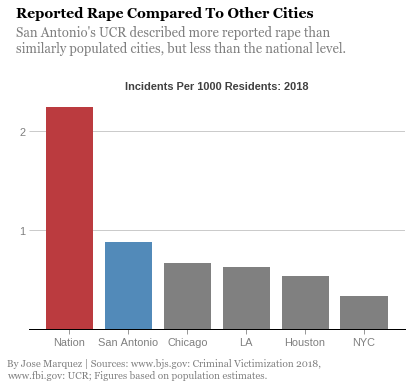

In [0]:
# Create bar chart
fig, ax = plt.subplots()

fig.patch.set(facecolor='white')
ax.set(facecolor='white')

# Title
fig.suptitle("Reported Rape Compared To Other Cities", fontweight="bold", 
             fontname="Georgia", ha="left", x=0.05, y=1.19, fontsize=14)

# Subtitle
subtitle = "San Antonio's UCR described more reported rape "\
           "than\nsimilarly populated cities, but less than " \
           "the national level." 

fig.text(s=subtitle, x=0.05, y=1.03, ha="left", 
         fontsize=13, fontname="Georgia", alpha=0.5)

# ax.grid(b=True, axis='y', zorder=)

# Remove vertical grid lines
ax.grid(b=False, axis='x')

ax.tick_params(axis='x', length=5, color=(0, 0, 0, 0.5))
ax.tick_params(axis='y', length=0, color=(0, 0, 0, 0.5))

# Remove ax1 top, right and left spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Darken bottom spine
ax.spines['bottom'].set_color("black")
ax.spines['bottom'].set_linewidth(1)


# Sort values in descending order
plot_df = plot_df.sort_values(by='r-per-1k', ascending=False)

# Plot bars
ax.bar(plot_df['loc'], 
       plot_df['r-per-1k'], 
       color=['#BB3B3F', '#528AB9', 
              'gray', 'gray', 
              'gray', 'gray'])
# Axe title (per 1000)
ax.set_title("Incidents Per 1000 Residents: 2018", fontsize=11, 
             fontweight="bold", fontname="Liberation Sans",
             alpha=0.75)

# Adjust tick parameters
ax.set_xticklabels(["Nation", "San Antonio", "Chicago", "LA", "Houston", "NYC"])
plt.xticks(fontname="Liberation Sans", fontsize=11, alpha=0.5)
plt.yticks(range(1,3), fontname="Liberation Sans", fontsize=11, alpha=0.5)

# Add footer
fig.text(
  s="By Jose Marquez | \
Sources: www.bjs.gov: \
Criminal Victimization 2018,\nwww.fbi.gov: UCR; \
Figures based on population estimates.", 
  x=0.03, y=-.1, ha="left", fontsize=10, fontname="Georgia", alpha=0.5)

plt.savefig('crimeBar.png', bbox_inches='tight', transparent=True, dpi=100)
plt.show()

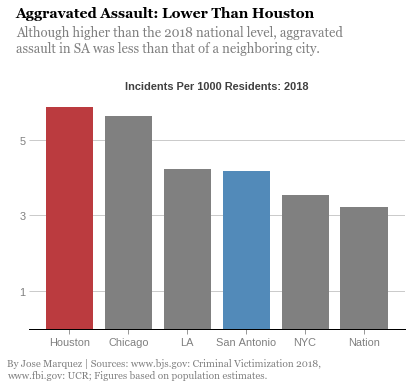

In [0]:
# Create bar chart
fig, ax = plt.subplots()

fig.patch.set(facecolor='white')
ax.set(facecolor='white')

# Title
fig.suptitle("Aggravated Assault: Lower Than Houston", fontweight="bold", 
             fontname="Georgia", ha="left", x=0.05, y=1.19, fontsize=14)

# Subtitle
subtitle = "Although higher than the 2018 national level, "\
           "aggravated\nassault in SA was less " \
           "than that of a neighboring city." 

fig.text(s=subtitle, x=0.05, y=1.03, ha="left", 
         fontsize=13, fontname="Georgia", alpha=0.5)

# ax.grid(b=True, axis='y', zorder=)

# Remove vertical grid lines
ax.grid(b=False, axis='x')

ax.tick_params(axis='x', length=5, color=(0, 0, 0, 0.5))
ax.tick_params(axis='y', length=0, color=(0, 0, 0, 0.5))

# Remove ax1 top, right and left spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Darken bottom spine
ax.spines['bottom'].set_color("black")
ax.spines['bottom'].set_linewidth(1)

# Sort values in descending order
plot_df = plot_df.sort_values(by='aa-per-1k', ascending=False)

# Set tick label parameters
ax.bar(plot_df['loc'], 
       plot_df['aa-per-1k'], 
       color=['#BB3B3F', 'gray', 
              'gray', '#528AB9', 
              'gray', 'gray'])
# Axe title (per 1000)
ax.set_title("Incidents Per 1000 Residents: 2018", fontsize=11, 
             fontweight="bold", fontname="Liberation Sans",
             alpha=0.75)

# Adjust tick parameters
ax.set_xticklabels(["Houston", "Chicago", "LA", "San Antonio", "NYC", "Nation"])
plt.xticks(fontname="Liberation Sans", fontsize=11, alpha=0.5)
plt.yticks(range(1, 7, 2), fontname="Liberation Sans", fontsize=11, alpha=0.5)

# Add footer
fig.text(
  s="By Jose Marquez | \
Sources: www.bjs.gov: \
Criminal Victimization 2018,\nwww.fbi.gov: UCR; \
Figures based on population estimates.", 
  x=0.03, y=-.1, ha="left", fontsize=10, fontname="Georgia", alpha=0.5)

plt.savefig('aaBar.png', bbox_inches='tight', transparent=True, dpi=100)
plt.show()

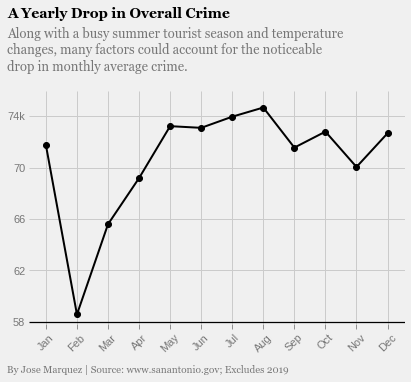

In [0]:
# Plot a single line representing yearly month averages of total crime

# Exclude incomplete data from 2019
condition = df['date'].dt.year != 2019
xi_to_viii = df[condition]

fig, ax = plt.subplots()

fig.suptitle("A Yearly Drop in Overall Crime", ha="left",
            fontweight='bold', fontsize=14, x=0.03, y=1.17, fontname="Georgia")

# Add subtitle
subtitle = "Along with a busy summer tourist season and temperature\n" \
           "changes, many factors could account for the noticeable\n" \
           "drop in monthly average crime." 

fig.text(s=subtitle, x=0.03, y=.95, ha="left", 
         fontsize=13, fontname="Georgia", alpha=0.5)


# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
 
# Darken x axis ticks
ax.tick_params(axis='x', length=5, color=(0,0,0,.5))

# Darken bottom line
y_gridlines = ax.get_ygridlines()
bottom_line = y_gridlines[0]
bottom_line.set_color('black')
bottom_line.set_linewidth(1.25)
bottom_line.set_zorder(0)

# Plot line
ax.plot(df.groupby(xi_to_viii['date'].dt.month).mean()['total-ucr-pt1'], 
        lw=2, color='black', marker='o')

# Set ticks and labels
ax.set_xticks(range(1,13)) 
ax.set_xticklabels(('Jan', 'Feb', 'Mar', 'Apr', 'May', 
                    'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 
                    'Nov', 'Dec'), alpha=0.5, rotation=45, 
                   fontsize=11, fontname="Liberation Sans")
ax.set_yticks(range(5800, 7401, 400))
ax.set_yticklabels(('58', '62', '66', '70', '74k'), 
                   alpha=0.5, fontsize=11, color='black', 
                   fontname="Liberation Sans")

# Adjust y axis bounds 
ax.set_ylim(bottom=5784, top=7600)

# Add footer
fig.text(s="By Jose Marquez | Source: www.sanantonio.gov; Excludes 2019", 
         x=0.03, y=-.1, ha="left", fontsize=10, fontname="Georgia", alpha=0.5)

plt.savefig('overall.png', bbox_inches='tight', transparent=True, dpi=100)
plt.show()

###Links to data sources:
[New York, Seven Major Crimes](https://www1.nyc.gov/assets/nypd/downloads/pdf/analysis_and_planning/historical-crime-data/seven-major-felony-offenses-2000-2018.pdf)<br>
[San Antonio, Uniform Crime Reports](https://www.sanantonio.gov/SAPD/Uniform-Crime-Reports)<br>
[Bureau of Justice Statistics, Criminal Victimization Report, 2018](https://www.bjs.gov/content/pub/pdf/cv18.pdf)<br>
[Crime in the U.S. 2018](https://ucr.fbi.gov/crime-in-the-u.s/2018/crime-in-the-u.s.-2018)<br>
[California Crime by City 2018](https://ucr.fbi.gov/crime-in-the-u.s/2018/crime-in-the-u.s.-2018/tables/table-8/table-8-state-cuts/california.xls)<br>
[Illinois Crime by City 2018](https://ucr.fbi.gov/crime-in-the-u.s/2018/crime-in-the-u.s.-2018/tables/table-8/table-8-state-cuts/illinois.xls)<br>
[Texas Crime by City 2018](https://ucr.fbi.gov/crime-in-the-u.s/2018/crime-in-the-u.s.-2018/tables/table-8/table-8-state-cuts/texas.xls)<br>
[United States Total Population Data](https://www.census.gov/data/datasets/time-series/demo/popest/2010s-national-total.html)<br>
[United States Cities Population Data](https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?src=bkmk)
